In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import egttools as egt

In [3]:
import pandas as pd

In [4]:
%load_ext autoreload

In [5]:
%autoreload 1

In [6]:
%aimport punishment_payoffs

In [7]:
set_4 = ["CNNN", "DNNN", "LNNN", "CNPN"]
strategy_set_9 = ["LNNN"]
for action in ["C", "D"]:
    for punish_coop in ["P", "N"]:
        for punish_def in ["P", "N"]:
            for punish_loners in ["N"]:
                strategy_set_9.append(action + punish_coop + punish_def+ punish_loners)
strategy_set_24 = []
for action in ["L", "C", "D"]:
    for punish_coop in ["P", "N"]:
        for punish_def in ["P", "N"]:
            for punish_loners in ["P", "N"]:
                strategy_set_24.append(action + punish_coop + punish_def+ punish_loners)

## Cooperation with pop size

In [8]:
def cooperation_level_single_pop_size(strategy_set, r=3.0, c=1.0, sigma=1.0, beta_fine=1.0, gamma_cost=1.0, group_size=5, population_size=100, beta=1.0):
    payoffs = np.empty((len(strategy_set), len(strategy_set))).tolist()
    for i in range(len(strategy_set)):
        for j in range(len(strategy_set)):
            payoffs[i][j] = punishment_payoffs.function_creator(i, j, r, c, sigma, beta_fine, gamma_cost, group_size, strategy_set=strategy_set)
    payoffs = np.array(payoffs)
    evolver = egt.analytical.StochDynamics(len(strategy_set), payoffs,population_size, group_size, mu=0.0)
    stationary = evolver.calculate_stationary_distribution(beta)
    ans = 0.0
    for i in range(len(payoffs)):
        ans = ans + stationary[i]*payoffs[i, i](group_size, group_size)
    # pure cooperation_payoff
    cooperation_strategy_index = strategy_set.index("CNNN")
    payoff_cooperation = payoffs[cooperation_strategy_index, cooperation_strategy_index](group_size, group_size)
    return ans/payoff_cooperation 

In [12]:
def cooperation_vs_n(strategy_set, r=3.0, c=1.0, sigma=1.0, beta_fine=1.0, gamma_cost=1.0, group_size=5):
    Z_line = list(range(10, 100))
    ans = list()
    for population_size in Z_line:
        ans.append(cooperation_level_single_pop_size(strategy_set, r=3.0, c=1.0, sigma=1.0, beta_fine=1.0, gamma_cost=1.0, group_size=5, population_size=population_size))
    return Z_line, ans

In [13]:
df =pd.read_pickle("figure3a.pkl")

In [14]:
df.head()

,N,Four,Nine,24
0,10.0,0.805144,0.804937,0.507890
1,11.0,0.814086,0.813995,0.510526
2,12.0,0.821648,0.821608,0.512515
3,13.0,0.828248,0.828230,0.514074
4,14.0,0.834128,0.834120,0.515305


In [10]:
#x, y_set4 = cooperation_vs_n(set_4, r=3.0, c=1.0, sigma=1.0, beta_fine=1.0, gamma_cost=1.0, group_size=5)

In [15]:
#x, y_set9 = cooperation_vs_n(strategy_set_9, r=3.0, c=1.0, sigma=1.0, beta_fine=1.0, gamma_cost=1.0, group_size=5)

In [ ]:
#x, y_set24 =  cooperation_vs_n(strategy_set_24, r=3.0, c=1.0, sigma=1.0, beta_fine=1.0, gamma_cost=1.0, group_size=5)

In [17]:
import seaborn 

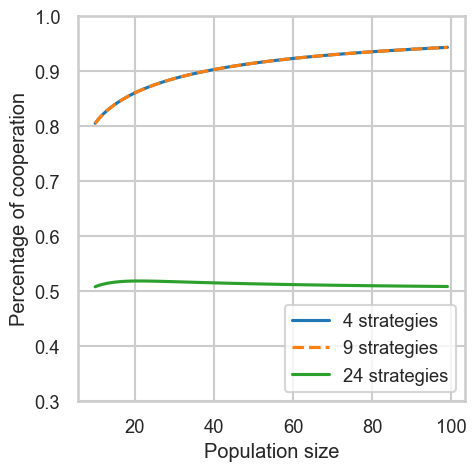

In [35]:
seaborn.set_context("talk", font_scale=0.8)
seaborn.set_style("whitegrid")
plt.figure(figsize=(5,5))
plt.plot(df["N"], df["Four"],  label="4 strategies") #, color="black",
plt.plot(df["N"], df["Nine"], label="9 strategies", linestyle='dashed') #linestyle='solid',color="gray" linewidth=0.7
plt.plot(df["N"], df["24"], label="24 strategies") #linestyle='solid',color="black",
plt.ylim([0.3, 1.0])
plt.legend(loc="lower right")
plt.xlabel("Population size")
plt.ylabel("Percentage of cooperation");
plt.savefig("figure3_punishment_popsize_v4.pdf", bbox_inches="tight")

In [69]:
df =  pd.DataFrame(np.array([x, y_set4, y_set9, y_set24]).transpose(), columns=["N", "Four", "Nine", "24"])

In [70]:
df.to_pickle("figure3a.pkl")